# Heap Sort: Corner Cases

In [1]:
# global imports
from time import time
import numpy as np
import matplotlib.pyplot as plt

## Heap Sort Function

In [2]:
# heap sort function
def heapSort(arr):
    '''sorts an array of integers from smallest to largest'''
    n = len(arr)
    for i in range(n-1, -1, -1):
        heapify(arr, n, i)
    for i in range(n - 1, 0, -1):
        swap(arr, i, 0)
        heapify(arr, i, 0)

# heapify function
def heapify(arr, n, i):
    '''turns an array into a heap'''
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2
    if left < n and arr[largest] < arr[left]:
        largest = left
    if right < n and arr[largest] < arr[right]:
        largest = right
    if largest != i:
        swap(arr, i, largest)
        heapify(arr, n, largest)
        
# swap function
def swap(nums, i, j):
    '''swaps the order of two items in an array'''
    temp = nums[i]
    nums[i] = nums[j]
    nums[j] = temp

## Arrays with Unusual Lengths

### Array of Length 0
Outcome 
* heapSort() successfully sorts an array of length 0

In [4]:
# array of length 0
empty = []
heapSort(empty)
empty

[]

### Array of Length 1
Outcome 
* heapSort() successfully sorts an array of length 1

In [5]:
# array of length 1
single = [1]
heapSort(single)
single

[1]

## Arrays with Different Data Types
heapSort() was designed to sort arrays containing positive integers. Here, I call heapSort() to order arrays that do not meet this assumption. 
### Array with Negative Numbers
Outcome
* heapSort() successfully sorts an array with negative numbers

In [13]:
# array with negative numbers
neg = [0, 9, -1, 3, 5, -3, 7, -16, 3]
heapSort(neg)
neg

[-16, -3, -1, 0, 3, 3, 5, 7, 9]

### Array with Decimals
Outcome
* heapSort() successfully sorts an array with decimals

In [11]:
# array with decimals
dec = [1, 3, 5, 2, 9, 4.4, 3, 6, 2, 8, 3]
heapSort(dec)
dec

[1, 2, 2, 3, 3, 3, 4.4, 5, 6, 8, 9]

### Array with String
Outcome
* heapSort() cannot sort an array with a string
* an error message occurs because the function cannot compare integers and strings

Correction
* create an if/else loop at the beginning of heapSort()
* have the loop check that an array only contains integers
    * if the array contains a string, raise ValueError
    
Modification
* create a new array that does not contain the string with an if/else statement
* sort the new array using heapSort()
* use append() to add the string to the end of the sorted array

In [10]:
# array with string
strNum = [6, 2, 4, 7, 2, 'hi', 9, 0, 1, 3, 7]
heapSort(strNum)

TypeError: '<' not supported between instances of 'int' and 'str'

### Array of Letters
Outcome
* heapSort() successfully sorts an array of letters
* letters are sorted alphabetically

In [9]:
# array of letters
letters = ['a', 'd', 'g', 'b', 'a', 'z', 'p']
heapSort(letters)
letters

['a', 'a', 'b', 'd', 'g', 'p', 'z']

### Array of Strings
Outcome
* heapSort() successfully sorts an array of strings
* strings are sorted alphabetically

In [7]:
# array of strings
strings = ['hi', 'cat', 'apple', 'a', 'stat', 'horse', 'car']
heapSort(strings)
strings

['a', 'apple', 'car', 'cat', 'hi', 'horse', 'stat']

## Performance on Arrays with Different Structures
Compare the average runtime for
- arrays where all elements are the same
- arrays where all place values are the same except the ones place
    - elements in the arrays are 1000000000 + (random integer between 0 and 9)
- arrays where elements are arranged in ascending order
- arrays where elements are arranged in descending order
  
### Timing Function

In [14]:
def timeOneHeap(arr):
    '''times how long it takes to sort an array'''
    t = 0
    t0 = time()
    s = heapSort(arr)
    t1 = time()
    t = t1 - t0
    return t

### Sort Arrays and Find Run Time

In [15]:
# import arrays
%store -r arrSame
%store -r arrKey
%store -r arrInc
%store -r arrDec

# master array of arrays
arr = [arrSame, arrKey, arrInc, arrDec]

# initiate time arrays
timeSame = []
timeKey = []
timeInd = []
timeDec = []

# master array of time arrays
times = [timeSame, timeKey, timeInd, timeDec]

# time how long it takes to sort each array
for i in range(0,4):
    for j in range(0,6):
        a = arr[i][j]
        t = timeOneHeap(a)
        times[i].append(t)

### Average Run Time of Sorting Each Array Structure

In [16]:
# initiate array of means
means = []

# find mean of each array type
for i in times:
    mean = np.mean(i)
    means.append(mean)

### Bar Graph of Average Run Time
* heapSort() performs the best when all elements are the same value
    * note that this is significantly better than all other input forms
* heapSort() performs the worst when all elements are in descending order

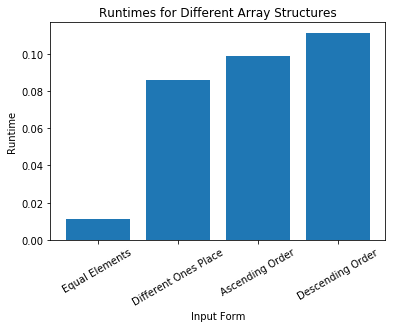

In [17]:
# labels for bar graph
label = ['Equal Elements','Different Ones Place','Ascending Order','Descending Order']
index = np.arange(len(label))

# bar graph
plt.bar(index, means)
plt.xlabel('Input Form')
plt.ylabel('Runtime')
plt.xticks(index, label, rotation=30)
plt.title('Runtimes for Different Array Structures')
plt.show()